In [26]:
# Importing python packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os 

# Importing files
REPO = 'viscosity_liquid_transfer_Pablo'
folder = os.getcwd().split(REPO)[0]+REPO+r'\Opentrons_experiments'

std = '204'

df_man = pd.read_csv(folder+r'\Std_calibrations\Viscosity_std_'+std+'.csv')

df_exp2 = pd.read_csv(folder+r'\BOTorch_optimization\VS_code_csv\Viscosity_std_'+std+'_3_vol_opt.csv')

df_exp3 = pd.read_csv(folder+r'\BOTorch_optimization\VS_code_csv\Viscosity_std_'+std+'_exp3_withacq.csv')

In [27]:
df_exp2['iteration']= None
counter =1 
for i in range(0,len(df_exp2)+1,3):
    df_exp2.loc[i:i+3,'iteration']=counter
    counter+=1
df_exp2

,liquid,pipette,volume,aspiration_rate,dispense_rate,blow_out_rate,delay_aspirate,delay_dispense,delay_blow_out,%error,time_asp_1000,acq_value,iteration
0,Viscosity_std_204,p1000,1000.0,89.911952,89.911952,0,5,5,0,-10.047459,32.243984,NaN,1
1,Viscosity_std_204,p1000,500.0,89.911952,89.911952,0,5,5,0,-5.313115,32.243984,NaN,1
2,Viscosity_std_204,p1000,300.0,89.911952,89.911952,0,5,5,0,-5.698962,32.243984,NaN,1
3,Viscosity_std_204,p1000,1000.0,112.389940,8.991195,0,5,5,0,2.812826,130.117512,NaN,2
4,Viscosity_std_204,p1000,500.0,112.389940,8.991195,0,5,5,0,4.734344,130.117512,NaN,2
5,Viscosity_std_204,p1000,300.0,112.389940,8.991195,0,5,5,0,3.599954,130.117512,NaN,2
6,Viscosity_std_204,p1000,1000.0,112.389940,112.389940,0,5,5,0,-12.026855,27.795187,NaN,3
7,Viscosity_std_204,p1000,500.0,112.389940,112.389940,0,5,5,0,-7.211483,27.795187,NaN,3
8,Viscosity_std_204,p1000,300.0,112.389940,112.389940,0,5,5,0,-4.232743,27.795187,NaN,3
9,Viscosity_std_204,p1000,1000.0,8.991195,112.389940,0,5,5,0,-11.193425,130.117512,NaN,4


In [28]:
df_exp3['iteration']= None
counter =1 
for row in df_exp3.drop_duplicates(['aspiration_rate','dispense_rate']).iterrows():
    df_repeat = df_exp3.loc[:,['aspiration_rate','dispense_rate']]== row[1].loc[['aspiration_rate','dispense_rate']]
    index = df_repeat.where(df_repeat.sum(axis=1)==2).dropna().index
    df_exp3.loc[index,'iteration']=counter
    counter+=1
volumes = ['1000.0','500.0','300.0']
for volume in volumes:
    index = df_exp3.where(df_exp3.volume==volume).dropna(how='all').index
    df_exp3.loc[index,'volume'] = volume[:-2]

df_exp3

,liquid,pipette,volume,aspiration_rate,dispense_rate,blow_out_rate,delay_aspirate,delay_dispense,delay_blow_out,%error,time_asp_1000,acq_value,iteration
0,Viscosity_std_204,p1000,1000,89.911952,89.911952,0,5,5,0,-10.047459,32.243984,NaN,1
1,Viscosity_std_204,p1000,500,89.911952,89.911952,0,5,5,0,-5.313115,32.243984,NaN,1
2,Viscosity_std_204,p1000,300,89.911952,89.911952,0,5,5,0,-5.698962,32.243984,NaN,1
3,Viscosity_std_204,p1000,"mean[300, 500, 1000]",89.911952,89.911952,0,5,5,0,-7.019845,32.243984,NaN,1
4,Viscosity_std_204,p1000,1000,112.389940,8.991195,0,5,5,0,2.812826,130.117512,NaN,2
5,Viscosity_std_204,p1000,500,112.389940,8.991195,0,5,5,0,4.734344,130.117512,NaN,2
6,Viscosity_std_204,p1000,300,112.389940,8.991195,0,5,5,0,3.599954,130.117512,NaN,2
7,Viscosity_std_204,p1000,"mean[300, 500, 1000]",112.389940,8.991195,0,5,5,0,-3.715708,130.117512,NaN,2
8,Viscosity_std_204,p1000,1000,112.389940,112.389940,0,5,5,0,-12.026855,27.795187,NaN,3
9,Viscosity_std_204,p1000,500,112.389940,112.389940,0,5,5,0,-7.211483,27.795187,NaN,3


In [44]:
df_man=df_man.drop_duplicates(subset=["volume","aspiration_rate","dispense_rate","blow_out_rate","delay_aspirate","delay_dispense","delay_blow_out","touch_tip_aspirate","touch_tip_dispense"], keep='first')
df_man['time_for_1000']=0
for i in range(len(df_man)):
    if (df_man['blow_out_rate'].iloc[i])<=0:
        df_man['time_for_1000'].iloc[i] = 1000/df_man["aspiration_rate"].iloc[i] + 1000/df_man["dispense_rate"].iloc[i] + df_man["delay_aspirate"].iloc[i] + df_man["delay_dispense"].iloc[i] + df_man["delay_blow_out"].iloc[i]
    else:
        df_man['time_for_1000'].iloc[i] = 1000/df_man["aspiration_rate"].iloc[i] + 1000/df_man["dispense_rate"].iloc[i] + 150/df_man["blow_out_rate"].iloc[i] + df_man["delay_aspirate"].iloc[i] + df_man["delay_dispense"].iloc[i] + df_man["delay_blow_out"].iloc[i]
df_man.reset_index(drop=True)

df_man['iteration']= None
counter= 1
for row in df_man.drop_duplicates(["aspiration_rate","dispense_rate","blow_out_rate","delay_aspirate","delay_dispense","delay_blow_out","touch_tip_aspirate","touch_tip_dispense"]).iterrows():
    df_repeat = df_man.loc[:,["aspiration_rate","dispense_rate","blow_out_rate","delay_aspirate","delay_dispense","delay_blow_out","touch_tip_aspirate","touch_tip_dispense"]]== row[1].loc[["aspiration_rate","dispense_rate","blow_out_rate","delay_aspirate","delay_dispense","delay_blow_out","touch_tip_aspirate","touch_tip_dispense"]]
    index = df_repeat.where(df_repeat.sum(axis=1)==8).dropna().index
    df_man.loc[index,'iteration']=counter
    counter+=1
df_man = df_man.sort_values('iteration')
df_man

c:\Users\quijanovelascop\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,liquid,Viscosity 900 s-1,Viscosity 100 s-1,Viscosity 10 s-1,pipette,volume,aspiration_rate,dispense_rate,blow_out_rate,delay_aspirate,delay_dispense,delay_blow_out,touch_tip_aspirate,touch_tip_dispense,time,%error,m_measured,m_expected,time_for_1000,iteration
0,Viscosity_std_204.8,204.8,204.8,204.8,p1000,1000,70,70,0,0.00,0,0,True,False,34.215777,-10.313694,0.7748,0.86390,28.571429,1
1,Viscosity_std_204.8,204.8,204.8,204.8,p1000,1000,70,70,5,0.00,0,0,True,False,60.686448,-0.266235,0.8616,0.86390,58.571429,2
3,Viscosity_std_204.8,204.8,204.8,204.8,p1000,1000,68,70,5,0.00,0,0,True,False,61.887612,-3.623105,0.8326,0.86390,58.991597,3
4,Viscosity_std_204.8,204.8,204.8,204.8,p1000,1000,70,70,5,5.00,0,0,True,False,66.569751,2.859127,0.8886,0.86390,63.571429,4
5,Viscosity_std_204.8,204.8,204.8,204.8,p1000,1000,70,70,5,2.50,0,0,True,False,64.114524,0.972335,0.8723,0.86390,61.071429,5
7,Viscosity_std_204.8,204.8,204.8,204.8,p1000,1000,70,70,5,2.00,0,0,True,False,63.622335,2.106725,0.8821,0.86390,60.571429,6
8,Viscosity_std_204.8,204.8,204.8,204.8,p1000,1000,70,70,5,1.50,0,0,True,False,63.215145,1.597407,0.8777,0.86390,60.071429,7
9,Viscosity_std_204.8,204.8,204.8,204.8,p1000,1000,70,70,5,1.00,0,0,True,False,62.691491,0.150480,0.8652,0.86390,59.571429,8
11,Viscosity_std_204.8,204.8,204.8,204.8,p1000,500,70,70,5,1.00,0,0,True,False,48.440264,5.614076,0.4562,0.43195,59.571429,8
12,Viscosity_std_204.8,204.8,204.8,204.8,p1000,500,70,70,5,0.50,0,0,True,False,48.039649,-0.173631,0.4312,0.43195,59.071429,9


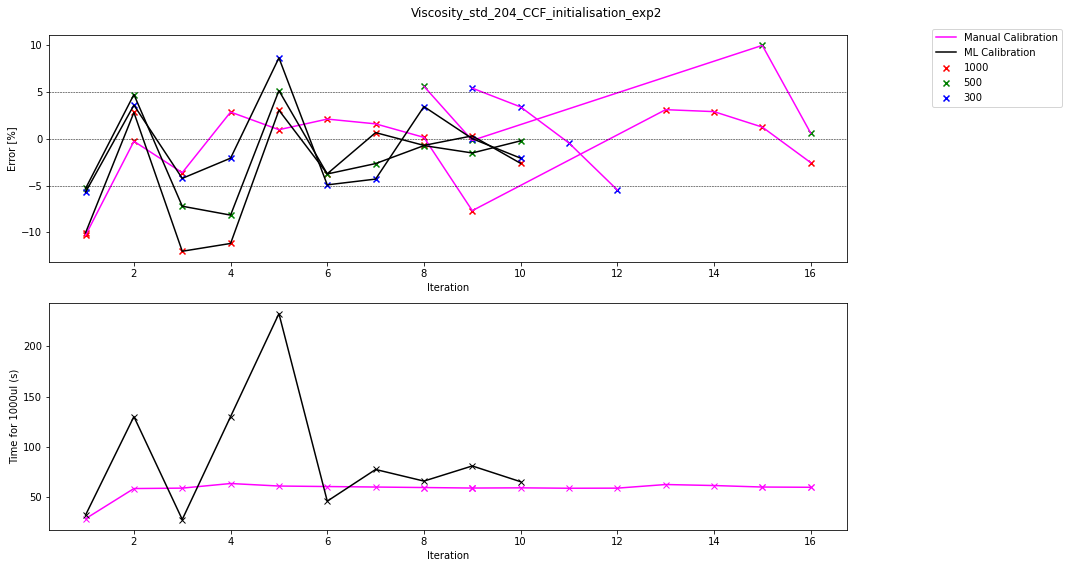

In [46]:
#Making subplots (2 rows, 1 column)
fig,axs = plt.subplots(2,1)

# Dropping NAN rows
df_man_1000 = df_man.where(df_man.volume==1000).dropna(how='all')
df_man_500 = df_man.where(df_man.volume==500).dropna(how='all')
df_man_300 = df_man.where(df_man.volume==300).dropna(how='all')
df_man_100 = df_man.where(df_man.volume==100).dropna(how='all')

df_exp2_1000 = df_exp2.where(df_exp2.volume==1000).dropna(how='all')
df_exp2_500 = df_exp2.where(df_exp2.volume==500).dropna(how='all')
df_exp2_300 = df_exp2.where(df_exp2.volume==300).dropna(how='all')
df_exp2_100 = df_exp2.where(df_exp2.volume==100).dropna(how='all')

# Plotting graph 1: Iteration against error
if len(df_man_1000) != 0:
    axs[0].scatter(df_man_1000['iteration'],df_man_1000['%error'], marker= 'x', label = '1000', c = 'red')
    axs[0].plot(df_man_1000['iteration'],df_man_1000['%error'], label = 'Manual Calibration', c = 'magenta')
if len(df_man_500) != 0:
    axs[0].scatter(df_man_500['iteration'],df_man_500['%error'], marker= 'x', label = '500', c = 'green')
    axs[0].plot(df_man_500['iteration'],df_man_500['%error'], c = 'magenta')
if len(df_man_300) != 0:
    axs[0].scatter(df_man_300['iteration'],df_man_300['%error'], marker= 'x', label = '300', c = 'blue')
    axs[0].plot(df_man_300['iteration'],df_man_300['%error'], c = 'magenta')
if len(df_man_100) != 0:
    axs[0].scatter(df_man_100['iteration'],df_man_100['%error'], marker= 'x', label = '100', c = 'grey')
    axs[0].plot(df_man_100['iteration'],df_man_100['%error'], c = 'magenta')

if len(df_exp2_1000) != 0:
    axs[0].scatter(df_exp2_1000['iteration'],df_exp2_1000['%error'], marker= 'x', c = 'red')
    axs[0].plot(df_exp2_1000['iteration'],df_exp2_1000['%error'], label = 'ML Calibration', c = 'black')
if len(df_exp2_500) != 0:
    axs[0].scatter(df_exp2_500['iteration'],df_exp2_500['%error'], marker= 'x', c = 'green')
    axs[0].plot(df_exp2_500['iteration'],df_exp2_500['%error'], c = 'black')
if len(df_exp2_300) != 0:
    axs[0].scatter(df_exp2_300['iteration'],df_exp2_300['%error'], marker= 'x', c = 'blue')
    axs[0].plot(df_exp2_300['iteration'],df_exp2_300['%error'], c = 'black')
if len(df_exp2_100) != 0:
    axs[0].scatter(df_exp2_100['iteration'],df_exp2_100['%error'], marker= 'x', c = 'grey')
    axs[0].plot(df_exp2_100['iteration'],df_exp2_100['%error'], c = 'black')


axs[0].axhline(y=0, ls = '--', color = 'black', linewidth=0.5)
axs[0].axhline(y=5, ls = '--', color = 'black', linewidth=0.5)
axs[0].axhline(y=-5, ls = '--', color = 'black', linewidth=0.5)

axs[0].set_xlabel('Iteration')
axs[0].set_ylabel('Error [%]')

axs[1].plot(df_man['iteration'],df_man['time_for_1000'], marker= 'x', label = 'Human Driven ', c = 'magenta')
axs[1].plot(df_exp2_1000['iteration'],df_exp2_1000['time_asp_1000'], marker= 'x', label = 'ML Driven ', c = 'black')

axs[1].set_xlabel('Iteration')
axs[1].set_ylabel('Time for 1000ul (s)')

fig.set_size_inches(15, 8)
fig.suptitle('Viscosity_std_'+std+'_'+'CCF_initialisation_exp2')
axs[0].legend(bbox_to_anchor=(1.1, 1.05))
fig.tight_layout()

# folder = folder = (r"C:\Users\admin\Documents\GitHub\viscosity_liquid_transfer_Pablo\Sartorious_experiments\Finalised_Data")
# fig.savefig(folder+r'/'+'Viscosity_std_'+std+'_line.png')


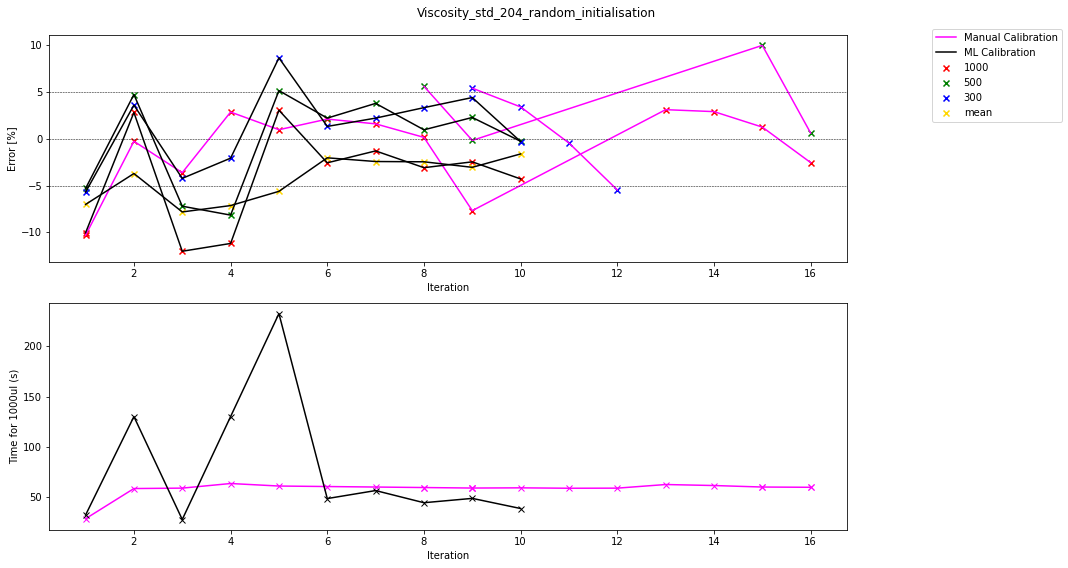

In [47]:
#Making subplots (2 rows, 1 column)
fig,axs = plt.subplots(2,1)

# Dropping NAN rows
df_man_1000 = df_man.where(df_man.volume==1000).dropna(how='all')
df_man_500 = df_man.where(df_man.volume==500).dropna(how='all')
df_man_300 = df_man.where(df_man.volume==300).dropna(how='all')
df_man_100 = df_man.where(df_man.volume==100).dropna(how='all')

df_exp3_1000 = df_exp3.where(df_exp3.volume=='1000').dropna(how='all')
df_exp3_500 = df_exp3.where(df_exp3.volume=='500').dropna(how='all')
df_exp3_300 = df_exp3.where(df_exp3.volume=='300').dropna(how='all')
df_exp3_100 = df_exp3.where(df_exp3.volume=='100').dropna(how='all')
df_exp3_mean = df_exp3.where(df_exp3.volume=='mean[300, 500, 1000]').dropna(how='all')


# Plotting graph 1: Iteration against error
if len(df_man_1000) != 0:
    axs[0].scatter(df_man_1000['iteration'],df_man_1000['%error'], marker= 'x', label = '1000', c = 'red')
    axs[0].plot(df_man_1000['iteration'],df_man_1000['%error'], label = 'Manual Calibration', c = 'magenta')
if len(df_man_500) != 0:
    axs[0].scatter(df_man_500['iteration'],df_man_500['%error'], marker= 'x', label = '500', c = 'green')
    axs[0].plot(df_man_500['iteration'],df_man_500['%error'], c = 'magenta')
if len(df_man_300) != 0:
    axs[0].scatter(df_man_300['iteration'],df_man_300['%error'], marker= 'x', label = '300', c = 'blue')
    axs[0].plot(df_man_300['iteration'],df_man_300['%error'], c = 'magenta')
if len(df_man_100) != 0:
    axs[0].scatter(df_man_100['iteration'],df_man_100['%error'], marker= 'x', label = '100', c = 'grey')
    axs[0].plot(df_man_100['iteration'],df_man_100['%error'], c = 'magenta')

if len(df_exp3_1000) != 0:
    axs[0].scatter(df_exp3_1000['iteration'],df_exp3_1000['%error'], marker= 'x', c = 'red')
    axs[0].plot(df_exp3_1000['iteration'],df_exp3_1000['%error'], label = 'ML Calibration', c = 'black')
if len(df_exp3_500) != 0:
    axs[0].scatter(df_exp3_500['iteration'],df_exp3_500['%error'], marker= 'x', c = 'green')
    axs[0].plot(df_exp3_500['iteration'],df_exp3_500['%error'], c = 'black')
if len(df_exp3_300) != 0:
    axs[0].scatter(df_exp3_300['iteration'],df_exp3_300['%error'], marker= 'x', c = 'blue')
    axs[0].plot(df_exp3_300['iteration'],df_exp3_300['%error'], c = 'black')
if len(df_exp3_100) != 0:
    axs[0].scatter(df_exp3_100['iteration'],df_exp3_100['%error'], marker= 'x', c = 'grey')
    axs[0].plot(df_exp3_100['iteration'],df_exp3_100['%error'], c = 'black')

if len(df_exp3_mean) != 0:
    axs[0].scatter(df_exp3_mean['iteration'],df_exp3_mean['%error'], marker= 'x', c = 'gold', label='mean')
    axs[0].plot(df_exp3_mean['iteration'],df_exp3_mean['%error'], c = 'black')



axs[0].axhline(y=0, ls = '--', color = 'black', linewidth=0.5)
axs[0].axhline(y=5, ls = '--', color = 'black', linewidth=0.5)
axs[0].axhline(y=-5, ls = '--', color = 'black', linewidth=0.5)

axs[0].set_xlabel('Iteration')
axs[0].set_ylabel('Error [%]')

axs[1].plot(df_man['iteration'],df_man['time_for_1000'], marker= 'x', label = 'Human Driven ', c = 'magenta')
axs[1].plot(df_exp3_1000['iteration'],df_exp3_1000['time_asp_1000'], marker= 'x', label = 'ML Driven ', c = 'black')

axs[1].set_xlabel('Iteration')
axs[1].set_ylabel('Time for 1000ul (s)')

fig.set_size_inches(15, 8)
fig.suptitle('Viscosity_std_'+std+'_'+'random_initialisation')
axs[0].legend(bbox_to_anchor=(1.1, 1.05))
fig.tight_layout()

# folder = folder = (r"C:\Users\admin\Documents\GitHub\viscosity_liquid_transfer_Pablo\Sartorious_experiments\Finalised_Data")
# fig.savefig(folder+r'/'+'Viscosity_std_'+std+'_line.png')
